<a href="https://colab.research.google.com/github/LuisFilipeAraujo/YOLO/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AVALIAÇÃO ICC 2022**   
### **LUIS FILIPE ALVES ARAUJO ---- JC3002616**

# **TREINAMENTO DA REDE CONVOLUCIONAL**

Exercício 1 – Usando a rede YOLO apresentada em aula, ative a rede com as imagens
disponibilizadas.
a) Explique se o objeto, pessoa ou animal foi reconhecido?
b) Explique o que aconteceu para cada uma das imagens.
c) Dê a sua opinião sobre o porquê a rede reconheceu ou não reconheceu as imagens.

## **INSTALAÇÃO DA DARKNET:**

Configuração da Darknet para uso dos recursos CUDA e OpenCV e instalação.

(Tende a demorar menos de um minuto)

In [1]:
# Baixa o repositório da Darknet:
!git clone https://github.com/AlexeyAB/darknet

# Configura o MAKEFILE para o uso do CUDA (DEPENDE DE GPGPU):
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# Verifica o CUDA:
!/usr/local/cuda/bin/nvcc --version

# Instala a Darknet:
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, c

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **TREINAMENTO DA REDE CONVOLUCIONAL YOLO:**

Acessa o ambiente de treinamento no Drive (que deve estar montado) e inicia a Darknet em modo de treinamento. O comando é o mesmo independente se será treinada a rede YOLOv4 Full ou YOLOv4 Tiny.

**Nota:** Isso pode demorar dentre horas a semanas, dependendo da rede e dos dados a serem consumidos. O código deve retomar o treinamento do ponto anterior à última interrupção.

In [3]:
# Acessa o ambiente:
%cd "/content/drive/MyDrive/WorCAP2021"

# Realiza o treinamento (comandos relativos ao ambiente):
! ./../../../darknet/darknet detector train data/directives.data model.cfg models/model_last.weights -dont_show -map

/content/drive/MyDrive/WorCAP2021
CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Dec 15 2022 - 06:00:21 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


**PARA EVITAR SER DESCONECTADO POR INATIVIDADE, INSIRA ESSE COMANDO NO CONSOLE DO NAVEGADOR (`Ctrl+Shift+I`):**

```

function ClickConnect(){
console.log("Working");
document
.querySelector('#top-toolbar > colab-connect-button')
.shadowRoot.querySelector('#connect')
.click()
}
setInterval(ClickConnect,60000);

function ClickConnect(){
console.log("Working");
document
.querySelector('#top-toolbar > colab-connect-button')
.shadowRoot.querySelector('#connect')
.click()
}
setInterval(ClickConnect,60000)

```

---
# **ATIVAÇÃO DA REDE**


**NECESSÁRIO PARA TODOS OS TIPOS DE ATIVAÇÃO:**

In [4]:
# Instala uma versão do OpenCV compatível com a Darknet:
!pip install opencv-python==4.5.3.56

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.9 MB 119 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [5]:
# Importa as bibliotecas utilizadas para a ativação:
from os import listdir
from cv2 import imread, imwrite, VideoWriter, VideoWriter_fourcc, VideoCapture, CAP_PROP_FPS, dnn, FONT_HERSHEY_PLAIN, rectangle, putText
from google.colab.patches import cv2_imshow as imshow
from numpy import argmax


# Define o caminho para o ambiente de ativação no Drive:
path = "/content/drive/MyDrive/WorCAP2021/activation/"

# Carrega a rede convolucional (arquitetura e pesos):
net = dnn.readNet(path + "networks/model.cfg", path + "networks/model.weights")

# Carrega as classes discrimináveis:
classes = []
with open(path + "networks/model.names", 'r') as f:
    classes = f.read().splitlines()

### **AVALIAÇÃO - RESPOSTAS**

**Na na seção a seguir "Ativação em Diretório Contendo Várias Imagens" a rede é ativada porém uma modificação foi feita na pasta escolhida. A pasta originalmete era a pasta "input" mas a troquei pela nova pasta que criei no meu drive chamada "avaliação" a qual contem as imagens IMG(1), IMG(2) , IMG(3) , IMG(4) , IMG(5)  e IMG(6).**

## **ATIVAÇÃO EM DIRETÓRIO CONTENDO VÁRIAS IMAGENS:**

In [6]:
# Carrega a lista de imagens no diretório de ativação:
image_files = []
for filename in listdir(path + "avaliacao"):
    image_files.append(filename)

# Executa a ativação em cada imagem dentro do diretório de ativação:
for image in image_files:
    # Carrega a imagem:
    img = imread(path + "avaliacao/" + image)

    # Define variáveis de execução, ponteiros e afins:
    height, width, _ = img.shape

    net.setInput(dnn.blobFromImage(img, (1 / 255), (415, 416), (0, 0, 0), swapRB=True, crop=False))
    boxes = []
    confidences = []
    class_ids = []

    # Detecção e armazenamento das instâncias de objetos:
    for output in net.forward(net.getUnconnectedOutLayersNames()):
        for detection in output:
            scores = detection[5:]
            class_id = argmax(scores)
            confidence = scores[class_id]
            if (confidence > 0.5):
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Renderização no quadro dos delimitadores, classe e índice de confiança de cada instância detectada:
    indexes = dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    if (len(indexes) > 0):
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            rectangle(img, (x, y), ((x + w), (y + h)), (0, 0, 200), 2)
            rectangle(img, (x, y - 20), (x + ((len(label) + len(str(confidence))) * 10), y), (0, 0, 200), -1)
            putText(img, (label + ' ' + confidence), (x, (y - 5)), FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2)

    # Armazenamento da imagem resultante em disco (no Drive):
    imwrite((path + "output/" + image), img)


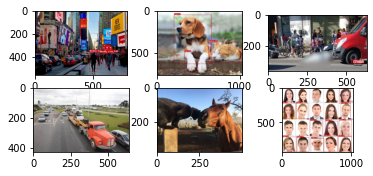

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
%matplotlib inline
     

# definir localização do dataset
folder = path + "output/"
# plotando imagens
for i in range(1,7):
  # definir subplot
  plt.subplot(330 + 3 + i)
  # definir "filename"
  filename = folder + 'IMG (' + str(i) + ').jpg'
  # carregar pixel da imagem 
  image = imread(filename)

  plt.imshow(image)

plt.show()

### **Imagem 1**

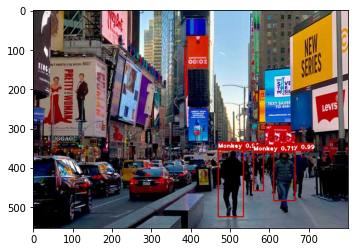

In [49]:
img1 = folder + 'IMG (1).jpg'
foto1 = imread(img1)
plt.imshow(foto1)

**Na imagem 1 os humanos foram detectados como macacos. A cor preta dos casacos pode ter ajudado a rede a chegar a essa conclusão pois se parecem com pelos** 

### **Imagem 2**

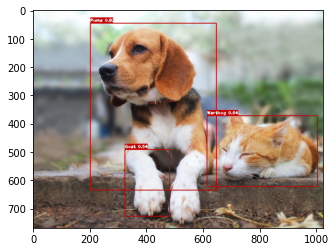

In [50]:
img2 = folder + 'IMG (2).jpg'
foto2 = imread(img2)
plt.imshow(foto2)

**Gato identificado como javali(warthog) e cachorro identificado como puma. O mais curioso aqui é a pata do cachorro ser identificada como bode(goat).**

**Isso ocorre pois a rede é especialista em apenas alguns animais especificos e não sabe como reagir a excessões tirando assim conclusões precipitadas. Fotos de cães, gatos e suas respectivas patas não se encontram no diretorio "input" que é usado para o treinamento.**

**As features parecidas com a de um puma como as cores e o formato de focinho fizeram com que a rede desse essa label ao cão.**

**O focinho do gato deve ser o causador da confusão com as features de javali.**

**A pata do cão tem garras expostas. Protuberâncias essas que lembram chifres de bodes. Muitas cabras/bodes do dataset de treinamento possuem pelo branco também.**

### **Imagem 3**

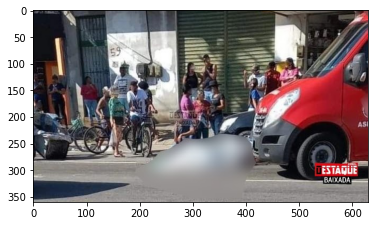

In [51]:
img3 = folder + 'IMG (3).jpg'
foto3 = imread(img3)
plt.imshow(foto3)

**Nada é detectado aqui na imagem 3. Curiosamente essa é a imagem que mais possui elementos.**
**Nesse caso as pessoas não são confundidas com macacos. Isso se deve ao fato de o rosto das pessoas (o principal feature analisado) estar borrado e poucas roupas inteiramente pretas serem detectadas.**

### **Imagem 4**

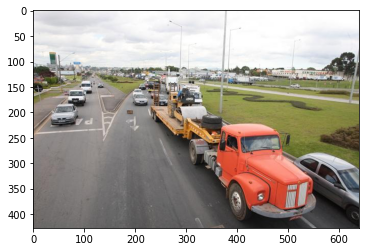

In [52]:
img4 = folder + 'IMG (4).jpg'
foto4 = imread(img4)
plt.imshow(foto4)

**Nada detectado na imagem 4. Os carros não tem nenhuma caracteristica de crocodilos, cabras, javalis ou qualquer outro animal e são muito distintos evitando assim falsos positivos.**

### **Imagem 5**

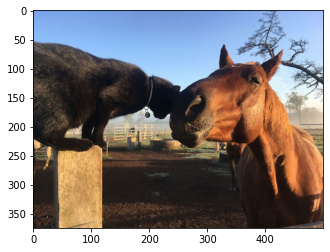

In [53]:
img5 = folder + 'IMG (5).jpg'
foto5 = imread(img5)
plt.imshow(foto5)

**Novamente sem detecções suspeitas. O gato tem o rosto coberto impedindo-o de ter o seu rosto classificado como puma.**
**O cavalo tem o focinho muito alongado para ser confundido com javali.**

### **Imagem 6**

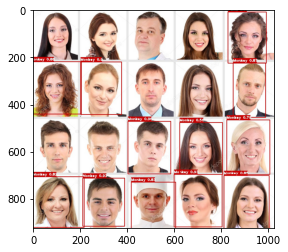

In [54]:
img6 = folder + 'IMG (6).jpg'
foto6 = imread(img6)
plt.imshow(foto6)

**Imagem 6 contém humanos. Todos são identificados como macacos (monkeys) reforçando mais a ideia de que boa parte das features analisadas e treinadas para se detectar macacos são features faciais. Por estas features se assemelharem muito com as humas acabam por ser confundidas pela rede que nunca teve contato com fotos humanas durante o treinamento**